<a href="https://colab.research.google.com/github/Vedant-kharangkar/API-INTEGRATION-AND-DATA-VISUALIZATION/blob/main/API_INTEGRATION_AND_DATA_VISUALIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

USE PYTHON TO FETCH DATA FROM A PUBLIC
API (E.G., OPENWEATHERMAP) AND CREATE
VISUALIZATIONS USING MATPLOTLIB OR
SEABORN.

Date         | Temp (°C)  | Min    | Max    | Humidity (%)  | Weather              | Pressure (hPa) 
----------------------------------------------------------------------------------------------------
Tue 15 Jul   | 30.3       | 30.3   | 30.3   | 67            | light rain           | 1001           
Wed 16 Jul   | 29.1       | 29.1   | 29.1   | 72            | light rain           | 1002           
Thu 17 Jul   | 28.3       | 28.3   | 28.3   | 75            | light rain           | 1003           
Fri 18 Jul   | 30.0       | 30.0   | 30.0   | 67            | light rain           | 1001           
Sat 19 Jul   | 30.5       | 30.5   | 30.5   | 64            | overcast clouds      | 999            


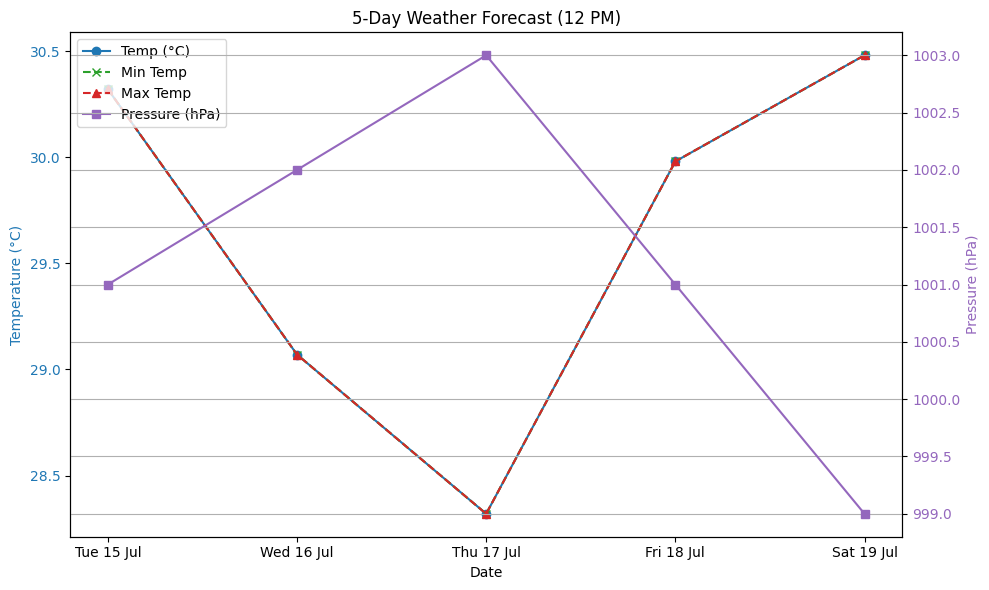

In [ ]:
import requests# for fetching data from the api
from datetime import datetime
import matplotlib.pyplot as plt# for visualization of fetched data
# using open weather api
# API details
API_KEY = "edb0b29b9738bd51bbc3cc2029913bf8" # my openweather api key
# Latitude and longitude value of nagpur , for getting nagpur weather data
LAT = 21.1458
LON = 79.0882
URL = "https://api.openweathermap.org/data/2.5/forecast"

# === Fetch Data ===
# fetching data of nagpur weatner
def fetch_weather_data():
    params = {
        "lat": LAT,
        "lon": LON,
        "appid": API_KEY,
        "units": "metric"
    }
    response = requests.get(URL, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print("Error:", response.status_code, response.json())
        return None

# === Extract forecast at 12 PM ===
# extracting 5 days weather data of nagpur inlcude temperature, min ,max ,pressure weather description
def extract_forecast(data):
    forecast_list = []

    for entry in data['list']:
        date = datetime.strptime(entry['dt_txt'], "%Y-%m-%d %H:%M:%S")
        if date.hour == 12:
            forecast_list.append({
                "date": date.strftime("%a %d %b"),
                "temp": entry['main']['temp'],
                "temp_min": entry['main']['temp_min'],
                "temp_max": entry['main']['temp_max'],
                "humidity": entry['main']['humidity'],
                "description": entry['weather'][0]['description'],
                "pressure": entry['main']['pressure']
            })

    return forecast_list

# === Display forecast in table format ===
def display_forecast_table(forecast_list):
    print(f"{'Date':<12} | {'Temp (°C)':<10} | {'Min':<6} | {'Max':<6} | {'Humidity (%)':<13} | {'Weather':<20} | {'Pressure (hPa)':<15}")
    print("-" * 100)

    for entry in forecast_list:
        print(f"{entry['date']:<12} | "
              f"{entry['temp']:<10.1f} | "
              f"{entry['temp_min']:<6.1f} | "
              f"{entry['temp_max']:<6.1f} | "
              f"{entry['humidity']:<13} | "
              f"{entry['description']:<20} | "
              f"{entry['pressure']:<15}")

# === Plot temperature and pressure ===
# visualization using matplotlib library
def plot_weather_forecast(forecast_list):
    dates = [entry['date'] for entry in forecast_list]
    temps = [entry['temp'] for entry in forecast_list]
    mins = [entry['temp_min'] for entry in forecast_list]
    maxs = [entry['temp_max'] for entry in forecast_list]
    pressure = [entry['pressure'] for entry in forecast_list]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot temperatures
    ax1.plot(dates, temps, marker='o', label='Temp (°C)', color='tab:blue')
    ax1.plot(dates, mins, marker='x', linestyle='--', label='Min Temp', color='tab:green')
    ax1.plot(dates, maxs, marker='^', linestyle='--', label='Max Temp', color='tab:red')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Temperature (°C)", color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_title("5-Day Weather Forecast (12 PM)")

    # Add pressure on secondary Y-axis
    ax2 = ax1.twinx()
    ax2.plot(dates, pressure, marker='s', label='Pressure (hPa)', color='tab:purple')
    ax2.set_ylabel("Pressure (hPa)", color='tab:purple')
    ax2.tick_params(axis='y', labelcolor='tab:purple')

    # Combine legends from both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# === Main ===
weather_data = fetch_weather_data()
if weather_data:
    forecast_list = extract_forecast(weather_data)
    display_forecast_table(forecast_list)
    plot_weather_forecast(forecast_list)